**Data Pre-Processing in Excel**

Extracted Month_Number,Week_Number and corresponding Weekly_total from the extracted excel sheet of Daily basis calls



In [ ]:
#importing pandas and numpy
import pandas as pd
import numpy as np

**1. Uploading Excel sheets**

In [ ]:
from google.colab import files
call_data_weekly=files.upload()

Saving Call_weekly_data.xlsx to Call_weekly_data.xlsx


**2. Reading files with Pandas**

In [ ]:
import io
df=pd.read_excel(io.BytesIO(call_data_weekly['Call_weekly_data.xlsx']))
df

,Month_Number,Week_Number,Weekly_Total
0,2,1,874
1,2,2,699
2,2,3,787
3,2,4,900
4,3,1,887
5,3,2,805
6,3,3,828
7,3,4,773
8,3,5,748


Now we should analyse our dataset.

We will import **seaborn library** to plot a boxplot which will describe to us about outliers.

Checking for the **Outliers** is important step which will help us in deciding best evaluation metrics.


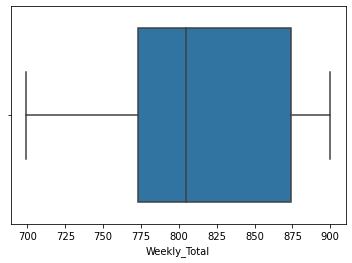

In [ ]:
import seaborn as sns
sns.boxplot(x = df["Weekly_Total"])

Our dataset has **No Outliers**

In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

**No validation** dataset because dataset is too small
Only Train/test set.

**Test Set size is 50%** to avoid **overfitting** caused due to very small dataset.


In [ ]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = tts(df.drop('Weekly_Total',axis = 1),df['Weekly_Total'],test_size = 0.5,random_state = 1)

Because our dataset is very small it is prone to OVERFITTING, therefore we will not use R-squared

because of outliers Mean Absolute Error is best method

We will use **Random Forest Regressor** as our model to predict the data(number of calls per hour).

Also, we will **avoid using R2 score** because of **overfitting caused due to small dataset **

Because our data has **Outlier, Mean Absolute Error** will be the best metric to evaluate our result.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators= 200 , max_depth=9 , n_jobs=-1 , random_state= 1)
# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

rfr.fit(X_train , y_train)

import numpy as np
mae_train = mean_absolute_error((y_train) ,(rfr.predict(X_train)))
mae_test = mean_absolute_error((y_test) , (rfr.predict(X_test)))
mse_train = mean_squared_error((y_train) ,(rfr.predict(X_train)))
mse_test = mean_squared_error((y_test) , (rfr.predict(X_test)))
rmse_train = np.sqrt(mean_squared_error((y_train) ,(rfr.predict(X_train))))
rmse_test = np.sqrt(mean_squared_error((y_test) , (rfr.predict(X_test))))
R_score_train = r2_score((y_train) , (rfr.predict(X_train)))
R_score_test = r2_score((y_test) , (rfr.predict(X_test)))


print("ACCURACY : ")
print("Because our dataset is very small it is prone to OVERFITTING, therefore we will not use R-squared")
print("Mean Absolute Error Training Set")
print(mae_train)
print("Mean Absolute Error Test Set")
print(mae_test)

# print("Higher the value greater the accuracy")
# print("R2 Score Training Set")
# print(R_score_train)
# print("R2 Score Test Set")
# print(R_score_test)


print("Root Mean Squared Error Training Set")
print(rmse_train)
print("Root Mean Squared Error Test Set")
print(rmse_test)
print("Mean Squared Error Training Set")
print(mse_train)
print("Mean Squared Error Test Set")
print(mse_test)


ACCURACY : 
Because our dataset is very small it is prone to OVERFITTING, therefore we will not use R-squared
Mean Absolute Error Training Set
18.731250000000017
Mean Absolute Error Test Set
79.77700000000002
Root Mean Squared Error Training Set
20.531755130772435
Root Mean Squared Error Test Set
93.56136609199335
Mean Squared Error Training Set
421.5529687500002
Mean Squared Error Test Set
8753.729225000003


# Calculating Number of Engineers required

Predicting for **Month_Number 4** and **Week_Number 2**

In [ ]:
data = [[4 , 2],]

In [ ]:
rfr.predict(data)

array([828.605])

##Further Processsing

The model predicts the number of calls.



In [ ]:
number_of_calls=828.605

Average Handling Time of call is given 14 minutes.

Engineers works for 7 hours 30 minutes (= 450 minutes) per day.

So, they will work for 2250 minutes(= 450 minutes * 5days) per week.

The number of minutes workers are required per week = the number of calls * Average Handling Time of calls

Thus, the number of resourses required = (The number of minutes workers are required) / (Number of minutes each workers works per week)

In [ ]:
number_of_resourses_required=(number_of_calls)*14/2250
number_of_resourses_required

5.155764444444445

#*`6 Engineers required on Week 2 and month 4 to handle Calls.`*